In [1]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

Write a program to simulate radioactive decay, using the information that a nucleus undergoes radioactive decay in time $\Delta t$ with probability $p = \alpha\Delta t$, with $\alpha \Delta t<<1$. You may want to proceed as follows: Consider a system initially having $N_0$ stable nuclei.
How does the number of parent nuclei, $N$, change in time? Graph the number of remaining nuclei as a function of time for the following cases: $N_0 = 100, a = 0.01 s^{-1},\Delta t = 1$ sec; and $N_0 = 5000, a = 0.03 s^{-1}, \Delta t = 1 $sec. Show the results on both linear and logarithmic scales for times between 0 and 300 secs. In addition, plot the same graphs (the expected curves) given $dN = - N\alpha dt$ i.e., $N(t) = N_0 e^{-\alpha t}$.

In [2]:
def RadDecaySim(N,a,t,T):
    curr=N
    X=[]
    Y=[]
    for i in range(0,T,t):
        X.append(i)
    for i in X:
        #print(curr)
        Y.append(curr)
        Rand=[random.random() for l in range(0,curr)]
        #print(Rand)
        c=0
        for j in range(curr):
            if Rand[j]>a*t:
                c+=1
        curr=c
    return(X,Y)

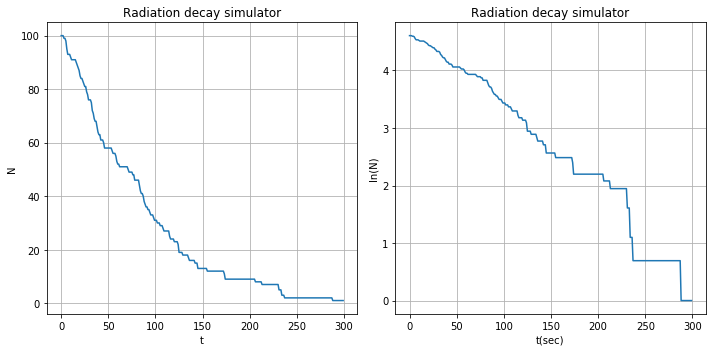

In [3]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplot(1,2,1)
X1,Y1=RadDecaySim(100,0.01,1,300)
plt.plot(X1,Y1,"-")
plt.xlabel('t')
plt.ylabel('N')
plt.title("Radiation decay simulator")
plt.grid()
#plt.show()
plt.subplot(1,2,2)
Yln1=[math.log(Y1[i]) for i in range(len(Y1))]
plt.plot(X1,Yln1,"-")
plt.xlabel('t(sec)')
plt.ylabel('ln(N)')
plt.title("Radiation decay simulator")
plt.grid()
fig.tight_layout()
plt.show()

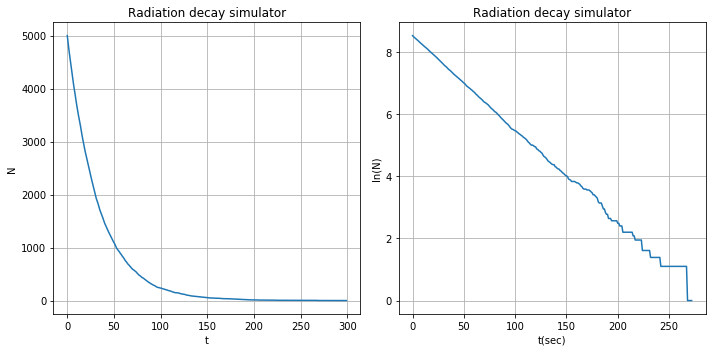

In [4]:
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplot(1,2,1)
X2,Y2=RadDecaySim(5000,0.03,1,300)
#print(Y2)

#print(len(Yln2))
plt.plot(X2,Y2,"-")
plt.xlabel('t')
plt.ylabel('N')
plt.title("Radiation decay simulator")
plt.grid()
plt.subplot(1,2,2)
Y2=[i for i in Y2 if i!=0]
X2=[X2[i] for i in range(len(Y2))]
Yln2=[math.log(Y2[j]) for j in range(len(Y2))]
plt.plot(X2,Yln2,"-")
plt.xlabel('t(sec)')
plt.ylabel('ln(N)')
plt.title("Radiation decay simulator")
plt.grid()
fig.tight_layout()
plt.show()

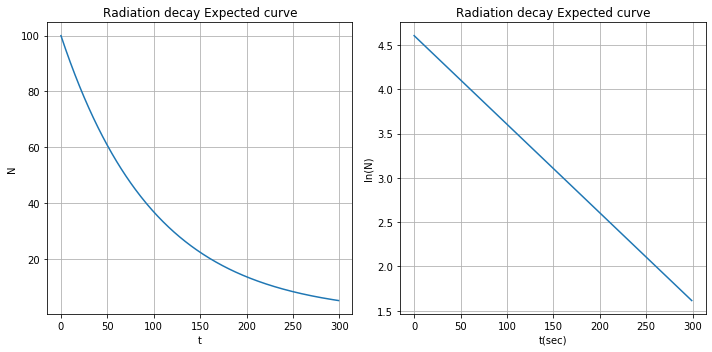

In [5]:
def Nexp1(N,a,t,T):
    return(N*math.exp(-1*a*t))
        
Xexp1=[i for i in range(300)]
Yexp1=[Nexp1(100,0.01,j,300) for j in Xexp1]
Ylnexp1=[math.log(l) for l in Yexp1]
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplot(1,2,1)
#print(Y2)
#print(len(Yln2))
plt.plot(Xexp1,Yexp1,"-")
plt.xlabel('t')
plt.ylabel('N')
plt.title("Radiation decay Expected curve")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Xexp1,Ylnexp1,"-")
plt.xlabel('t(sec)')
plt.ylabel('ln(N)')
plt.title("Radiation decay Expected curve")
plt.grid()
fig.tight_layout()
plt.show()

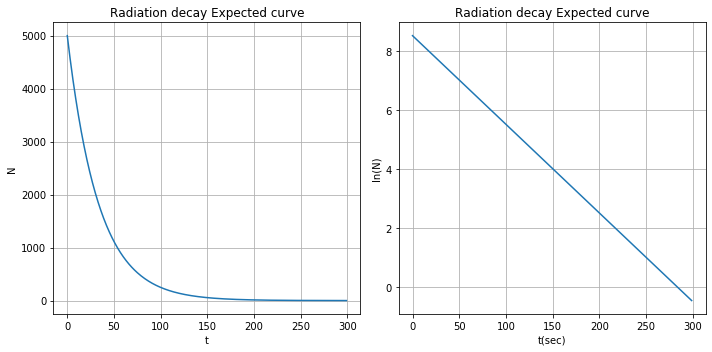

In [6]:
Xexp2=[i for i in range(300)]
Yexp2=[Nexp1(5000,0.03,j,300) for j in Xexp2]
Ylnexp2=[math.log(l) for l in Yexp2]
fig,ax=plt.subplots(2,1,figsize=(10,5))
plt.subplot(1,2,1)
#print(Y2)
#print(len(Yln2))
plt.plot(Xexp2,Yexp2,"-")
plt.xlabel('t')
plt.ylabel('N')
plt.title("Radiation decay Expected curve")
plt.grid()
plt.subplot(1,2,2)
plt.plot(Xexp2,Ylnexp2,"-")
plt.xlabel('t(sec)')
plt.ylabel('ln(N)')
plt.title("Radiation decay Expected curve")
plt.grid()
fig.tight_layout()
plt.show()

Modify the above program to simulate an experiment that counts the number of decays observed in a time interval, T. Allow the experiment to be repeated and the histogram the distribution of number of decays for the following two cases:

a) $N_0 = 500, \alpha = 4\times10^{-5} s^{-1} , \Delta t = 10 sec, T=100 $sec

b) $N_0 = 500, \alpha = 2\times10^{-5} s^{-1}, \Delta t = 10 sec, T=100 $sec 

In each case, show the distribution using 1000 experiments and overlay the expected Poisson distributions .

In [7]:
def RadDecaySim2(N,a,t,T):
    curr=0
    C=0
    K=[]
    for i in range(0,T,t):
        K.append(curr)
        Rand=[random.random() for l in range(0,N-curr)]
        #print(Rand)
        for j in range(N-curr):
            if Rand[j]<a*t:
                C+=1
            #print(C)
        curr=C
    return(C)
def DecHist(N,a,t,T,X):
    Y=[]
    S=0
    for i in range(X):
        y=RadDecaySim2(N,a,t,T)
        Y.append(y)
        S+=y
    L=S/X
    fig,ax1=plt.subplots()
    PD=[L**j*math.exp(-1*L)/math.factorial(j) for j in range(0,max(Y)+1)]
    X=[k for k in range(0,max(Y)+1)]
    #print(bins)
    #plt.plot(X,PD,"o-","red")
    ax1.bar(*np.unique(Y, return_counts=True))
    ax1.set_ylim(0,400)
    ax1.set_xlabel('occurances')
    ax1.set_ylabel('Number of occurances')
    ax2=ax1.twinx()
    ax2.plot(X,PD,linestyle='-',marker='o',color='black')
    ax2.set_ylim(0,0.4)
    ax2.set_ylabel('frequencies')
    #plt.grid()
    plt.show()

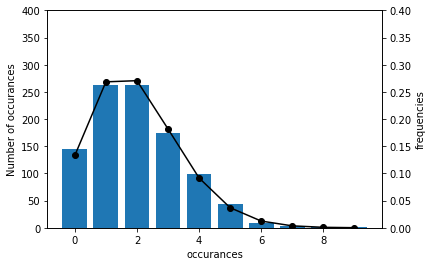

In [8]:
DecHist(500,4*10**-5,10,100,1000)

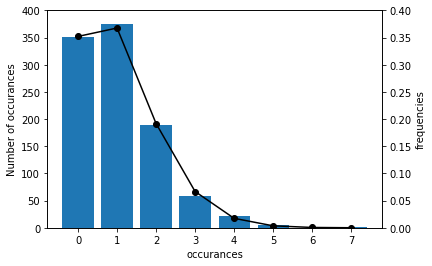

In [9]:
DecHist(500,2*10**-5,10,100,1000)

Write a program to generate the distribution $f(\theta)=1/(\sin^2{\theta}+ a \cos^2{\theta})$, where $0<\theta<\pi$.
Compare your results using the inversion technique and the acceptance-rejection technique: 10000 trials each for values of a=0.5 and 0.001. You should overlay the plots for four different f(q) distributions, properly normalized.

In [10]:
def DistFunction(u):
    return(np.arctan(np.sqrt(0.5)*np.tan((u-1)*np.pi)))

#DistFunction(0)
#DistFunction(1)

In [11]:
def Func1(th):
    return(1/((2)**0.5*np.pi*(np.sin(th)**2+0.5*np.cos(th)**2)))

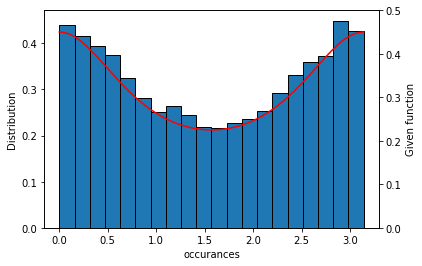

In [12]:
fig,ax1=plt.subplots()
Y=DistFunction(np.random.rand(10000))
for i in range(10000):
    if Y[i]<0:
        Y[i]=Y[i]+np.pi
#print(Y)
X=np.arange(0,np.pi,0.01)
Curve=Func1(X)
#print(Curve)
#plt.plot(X,PD,"o-","red")
ax1.hist(Y,edgecolor='black',bins=20,density=True)

ax1.set_xlabel('occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
ax2.plot(X,Curve,linestyle='-',color='red')
ax2.set_ylim(0,0.5)
ax2.set_ylabel('Given function')
    #plt.grid()
plt.show()
    

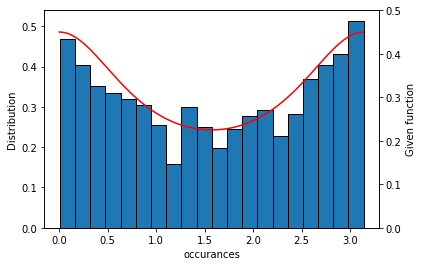

In [13]:
U1= np.random.rand(10000)
U2= np.random.rand(10000)
Y=[]
for i in range(10000):
    if Func1(np.pi*U1[i])>=U2[i]*2.25:
        Y.append(np.pi*U1[i])
fig,ax1=plt.subplots()
ax1.hist(Y,edgecolor='black',bins=20,density=True)
ax1.set_xlabel('occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
X=np.arange(0,np.pi,0.01)
Curve=Func1(X)
ax2.plot(X,Curve,linestyle='-',color='red')
ax2.set_ylim(0,0.5)
ax2.set_ylabel('Given function')
plt.show()

In [14]:
def DistFunctioN(u):
    return(np.arctan(np.tan((u-1)*np.pi)/(10)**(3/2)))
def Func2(th):
    return(1/((10)**1.5*np.pi*(np.sin(th)**2+0.001*np.cos(th)**2)))

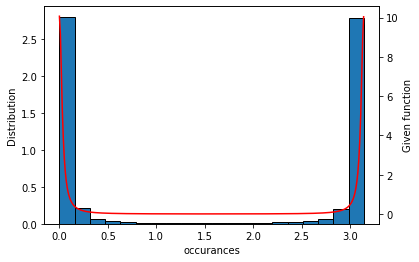

In [15]:
fig,ax1=plt.subplots()
Y=DistFunctioN(np.random.rand(10000))
for i in range(10000):
    if Y[i]<0:
        Y[i]=Y[i]+np.pi
#print(Y)
X=np.arange(0,np.pi,0.01)
Curve=Func2(X)
#print(Curve)
#plt.plot(X,PD,"o-","red")
ax1.hist(Y,edgecolor='black',bins=20,density=True)

ax1.set_xlabel('occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
ax2.plot(X,Curve,linestyle='-',color='red')
ax2.set_ylabel('Given function')
    #plt.grid()
plt.show()

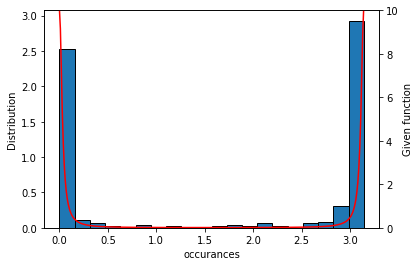

In [16]:
U1= np.random.rand(10000)
U2= np.random.rand(10000)
Y=[]
for i in range(10000):
    if Func2(np.pi*U1[i])>=U2[i]*11:
        Y.append(np.pi*U1[i])
fig,ax1=plt.subplots()
ax1.hist(Y,edgecolor='black',bins=20,density=True)
ax1.set_xlabel('occurances')
ax1.set_ylabel('Distribution')
ax2=ax1.twinx()
X=np.arange(0,np.pi,0.01)
Curve=Func2(X)
ax2.plot(X,Curve,linestyle='-',color='red')
ax2.set_ylim(0,10)
ax2.set_ylabel('Given function')
plt.show()